# 两资产投资组合的简单案例

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

有资产A和资产B.       
资产A的平均收益率为8%,标准差为12%;        
资产B的平均收益率为15%,标准差为25%;          
计算在A和B的相关系数分别为-1.-0.5, 0 ,0.5, 1时的期望收益率

In [14]:
#cal_mean表示投资组合的平均收益率
#frac表示A资产所占的百分比
def cal_mean(frac):
    return 0.08*frac+0.15*(1-frac)

In [15]:
# 生成51个平均收益率值,时A的百分比从 0%--100% 步长为:2%
mean = list(map(cal_mean,[x/50 for x in range(51)]))

In [16]:
# 计算投资组合的标准差
#A资产的方差为0.0144 B资产的方差为0.0625,0,03是AB标准差相乘
def cal_std(frac,p):
    return math.sqrt(0.0144*frac**2 + 0.0625*(1-frac)**2+2*frac*(1-frac)*p*0.03) 

In [17]:
#初始化一个5*51的投资组合的标准差矩阵:行为相关系数,列为收益率
std_matrix = np.zeros((5,51))

In [18]:
#建立一个相关系数的字典
dct = {0:-1,1:-0.5,2:0,3:0.5,4:1}

In [19]:
for i in range(5):
    for j in range(51):
        std_matrix[i,j] = cal_std(j/50,dct[i])

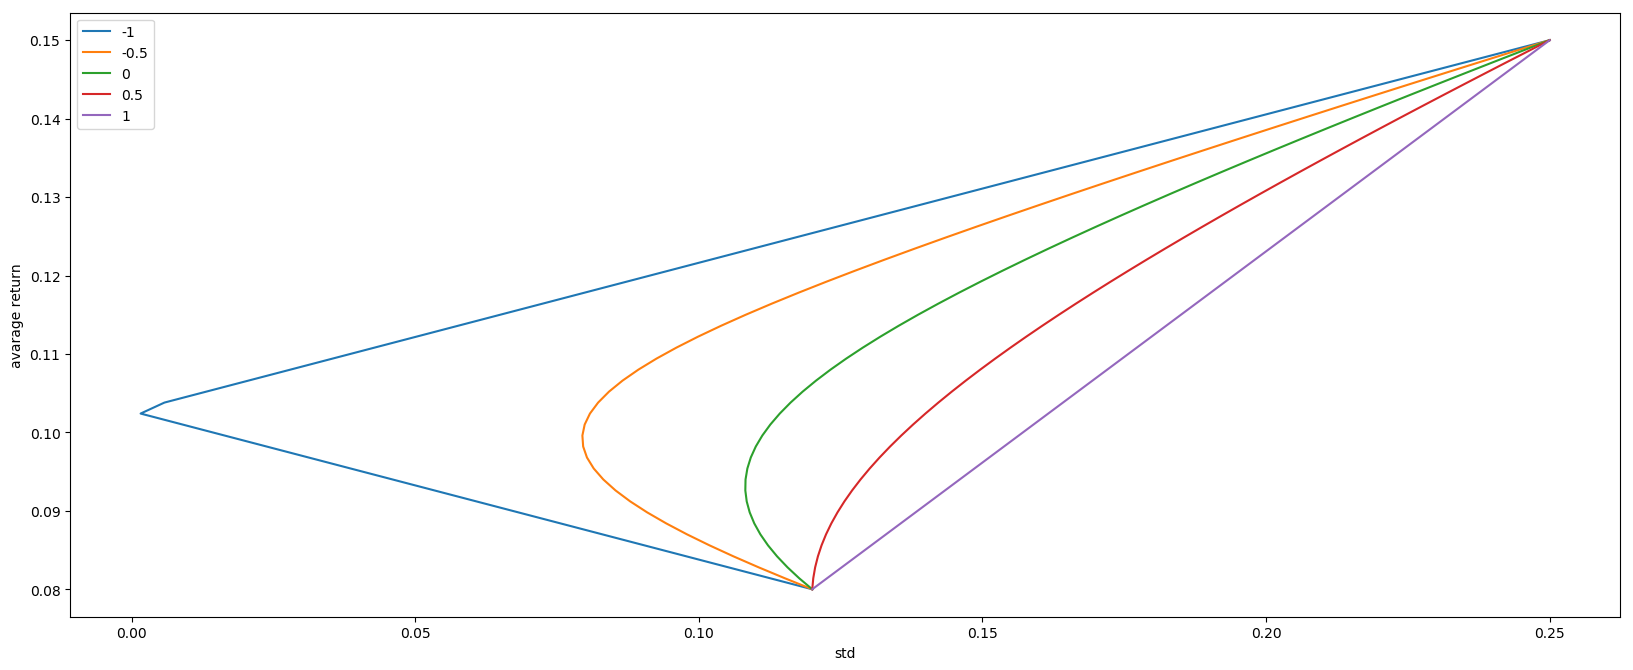

In [30]:
plt.figure(figsize=(20,8),dpi=100)
plt.plot(std_matrix[0,:],mean,label='-1')
plt.plot(std_matrix[1,:],mean,label='-0.5')
plt.plot(std_matrix[2,:],mean,label='0')
plt.plot(std_matrix[3,:],mean,label='0.5')
plt.plot(std_matrix[4,:],mean,label='1')
plt.legend()
plt.xlabel('std')
plt.ylabel('avarage return')
plt.show()

In [43]:
min_index = np.argmin(std_matrix)
print(min_index)

34


In [48]:
print('最小方差为:{} 对应的平均收益为{}'.format(std_matrix[0,min_index],cal_mean(min_index/50)))

最小方差为:0.0016000000000001278 对应的平均收益为0.10239999999999999
